In [9]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [10]:
import psycopg2

connection = psycopg2.connect(database="paid_search_campaign", user="postgres", password="postgres", host="localhost", port=5432)

cursor = connection.cursor()

cursor.execute("SELECT * from mall_campaigns;")

# Fetch all rows from database
record = cursor.fetchall()

print("Data from Database:- ", record)


Data from Database:-  [('Shop - Phrase - Mob - Sale', 'September', 6444, 593, Decimal('0.09202358783364369957'), 27, Decimal('0.04553119730185497470'), 231, Decimal('0.38954468802698145025'), 221, Decimal('5500.5'), Decimal('-10'), Decimal('0.95670995670995670996'), 'Phrase', 'Mob', 'Sale', datetime.date(2021, 9, 1)), ('Shop - Phrase - Mob - Discount Code', 'September', 1848, 447, Decimal('0.24188311688311688312'), 28, Decimal('0.06263982102908277405'), 217, Decimal('0.48545861297539149888'), 179, Decimal('3765.3'), Decimal('-38'), Decimal('0.82488479262672811060'), 'Phrase', 'Mob', 'Discount Code', datetime.date(2021, 9, 1)), ('Shop - Exact - Mob - Sale', 'September', 8902, 661, Decimal('0.07425297685913277915'), 25, Decimal('0.03782148260211800303'), 216, Decimal('0.32677760968229954614'), 173, Decimal('4259.42'), Decimal('-43'), Decimal('0.80092592592592592593'), 'Exact', 'Mob', 'Sale', datetime.date(2021, 9, 1)), ('Shop - Exact - Mob - Competitor', 'September', 1077, 368, Decimal('

In [11]:
column_names = [
    'ad_group',
    'month',
	'impressions',
	'clicks',
	'ctr',
	'conversions',
	'conv_rate',
	'cost',
	'cpc',
	'revenue',
	'sale_amount',
	'pnl',
    'roas',
    'match_type',
    'device_type',
    'ad_type',
    'date'
]

df = pd.DataFrame(record, columns= column_names)
df.head()

,ad_group,month,impressions,clicks,ctr,conversions,conv_rate,cost,cpc,revenue,sale_amount,pnl,roas,match_type,device_type,ad_type,date
0,Shop - Phrase - Mob - Sale,September,6444,593,0.09202358783364369957,27,0.04553119730185497470,231,0.38954468802698145025,221,5500.5,-10,0.95670995670995670996,Phrase,Mob,Sale,2021-09-01
1,Shop - Phrase - Mob - Discount Code,September,1848,447,0.24188311688311688312,28,0.06263982102908277405,217,0.48545861297539149888,179,3765.3,-38,0.82488479262672811060,Phrase,Mob,Discount Code,2021-09-01
2,Shop - Exact - Mob - Sale,September,8902,661,0.07425297685913277915,25,0.03782148260211800303,216,0.32677760968229954614,173,4259.42,-43,0.80092592592592592593,Exact,Mob,Sale,2021-09-01
3,Shop - Exact - Mob - Competitor,September,1077,368,0.34168987929433611885,14,0.03804347826086956522,164,0.44565217391304347826,67,1430.86,-97,0.40853658536585365854,Exact,Mob,Competitor,2021-09-01
4,Shop - Phrase - Desk - Discount Code,September,810,123,0.15185185185185185185,17,0.13821138211382113821,134,1.0894308943089431,121,2514.88,-13,0.90298507462686567164,Phrase,Desk,Discount Code,2021-09-01


In [12]:
df.describe()

,impressions,clicks,conversions,cost,revenue
count,190.000000,190.000000,190.000000,190.000000,190.000000
mean,14077.363158,4865.805263,505.242105,3344.063158,2957.684211
std,29771.686227,11348.529219,1052.202922,6524.606753,5962.413097
min,35.000000,2.000000,0.000000,1.000000,0.000000
25%,1065.000000,264.500000,24.000000,188.500000,144.500000
50%,4969.000000,930.000000,70.500000,563.500000,459.500000
75%,13380.000000,4190.500000,428.250000,2967.000000,2672.250000
max,276568.000000,99526.000000,7563.000000,43542.000000,42440.000000


In [13]:
df.dtypes

ad_group       object
month          object
impressions     int64
clicks          int64
ctr            object
conversions     int64
conv_rate      object
cost            int64
cpc            object
revenue         int64
sale_amount    object
pnl            object
roas           object
match_type     object
device_type    object
ad_type        object
date           object
dtype: object

In [14]:
# Convert specified columns to float
df[['ctr', 'conv_rate', 'cpc', 'sale_amount', 'pnl', 'roas']] = df[['ctr', 'conv_rate', 'cpc', 'sale_amount', 'pnl', 'roas']].astype(float)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Verify the changes
df.dtypes

ad_group               object
month                  object
impressions             int64
clicks                  int64
ctr                   float64
conversions             int64
conv_rate             float64
cost                    int64
cpc                   float64
revenue                 int64
sale_amount           float64
pnl                   float64
roas                  float64
match_type             object
device_type            object
ad_type                object
date           datetime64[ns]
dtype: object

In [15]:
df.describe()

,impressions,clicks,ctr,conversions,conv_rate,cost,cpc,revenue,sale_amount,pnl,roas,date
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190
mean,14077.363158,4865.805263,0.271861,505.242105,0.112584,3344.063158,0.784377,2957.684211,63416.180579,-386.378947,1.032206,2021-08-31 18:18:56.842105344
min,35.000000,2.000000,0.052632,0.000000,0.000000,1.000000,0.125000,0.000000,0.000000,-5672.000000,0.000000,2021-07-01 00:00:00
25%,1065.000000,264.500000,0.190385,24.000000,0.058824,188.500000,0.461538,144.500000,2985.135000,-294.750000,0.659233,2021-08-01 00:00:00
50%,4969.000000,930.000000,0.286339,70.500000,0.103760,563.500000,0.635712,459.500000,10274.105000,-76.000000,0.848149,2021-09-01 00:00:00
75%,13380.000000,4190.500000,0.356468,428.250000,0.163562,2967.000000,1.111356,2672.250000,59345.195000,-6.000000,0.967513,2021-10-01 00:00:00
max,276568.000000,99526.000000,0.472714,7563.000000,0.400000,43542.000000,2.018405,42440.000000,886095.310000,1508.000000,20.000000,2021-11-01 00:00:00
std,29771.686227,11348.529219,0.107728,1052.202922,0.066646,6524.606753,0.407920,5962.413097,125414.656922,903.076361,1.830349,NaN


Overall Campaign Summary:
               ctr         cpc   conv_rate        roas
count  190.000000  190.000000  190.000000  190.000000
mean     0.271861    0.784377    0.112584    1.032206
std      0.107728    0.407920    0.066646    1.830349
min      0.052632    0.125000    0.000000    0.000000
25%      0.190385    0.461538    0.058824    0.659233
50%      0.286339    0.635712    0.103760    0.848149
75%      0.356468    1.111356    0.163562    0.967513
max      0.472714    2.018405    0.400000   20.000000


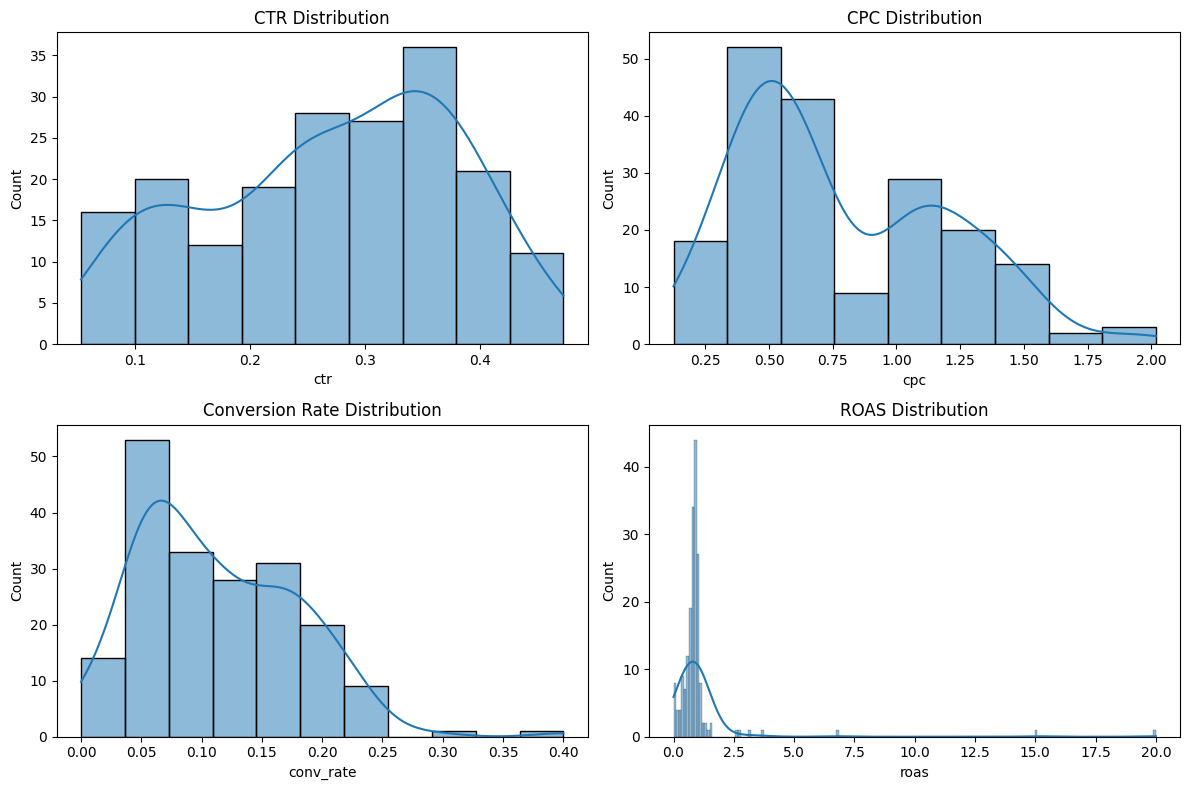

In [16]:
# Calculate summary statistics for the overall campaigns
comparison_columns = ['ctr', 'cpc', 'conv_rate', 'roas']
overall_summary = df[comparison_columns].describe()
print("Overall Campaign Summary:\n", overall_summary)

# Visualize the overall campaigns
plt.figure(figsize=(12, 8))

# Plot CTR
plt.subplot(2, 2, 1)
sns.histplot(df['ctr'], kde=True)
plt.title('CTR Distribution')

# Plot CPC
plt.subplot(2, 2, 2)
sns.histplot(df['cpc'], kde=True)
plt.title('CPC Distribution')

# Plot Conversion Rate
plt.subplot(2, 2, 3)
sns.histplot(df['conv_rate'], kde=True)
plt.title('Conversion Rate Distribution')

# Plot ROAS
plt.subplot(2, 2, 4)
sns.histplot(df['roas'], kde=True)
plt.title('ROAS Distribution')

plt.tight_layout()
plt.show()

In [17]:
comparison_columns = ['ctr', 'cpc', 'conv_rate', 'roas']

# Group by match_type and calculate mean
match_type_comparison = df.groupby('match_type')[comparison_columns].mean()

# Group by device_type and calculate mean
device_type_comparison = df.groupby('device_type')[comparison_columns].mean()

# Group by ad_type and calculate mean
ad_type_comparison = df.groupby('ad_type')[comparison_columns].mean()


print("Comparison by Match Type:\n", match_type_comparison)
print("\nComparison by Device Type:\n", device_type_comparison)
print("\nComparison by Ad Type:\n", ad_type_comparison)


Comparison by Match Type:
                  ctr       cpc  conv_rate      roas
match_type                                         
1:1         0.386788  0.928476   0.139236  0.905920
Exact       0.255112  0.760179   0.107553  1.023416
Phrase      0.205091  0.704042   0.098313  1.134370

Comparison by Device Type:
                   ctr       cpc  conv_rate      roas
device_type                                         
Desk         0.252382  1.069616   0.152362  1.180028
Mob          0.290934  0.505079   0.073634  0.887464

Comparison by Ad Type:
                                 ctr       cpc  conv_rate      roas
ad_type                                                           
Black Friday/Cyber Monday  0.083012  0.145207   0.190946  9.318182
Competitor                 0.232130  0.664672   0.115743  1.309516
Coupon Code                0.322103  0.802254   0.111507  0.884890
Discount Code              0.213493  0.771133   0.086335  0.772941
Free Shipping              0.200857  0.335079

In [18]:
# Group by ad_group and calculate mean for comparison columns
ad_group_comparison = df.groupby('ad_group')[comparison_columns].mean()

# Sort and get top 5 ad groups by CTR
top_5_ctr = ad_group_comparison.sort_values(by='ctr', ascending=False).head(5)
print("Top 5 Ad Groups by CTR:\n", top_5_ctr)

# Sort and get top 5 ad groups by CPC (lowest to highest)
top_5_cpc = ad_group_comparison.sort_values(by='cpc', ascending=True).head(5)
print("\nTop 5 Ad Groups by CPC:\n", top_5_cpc)

# Sort and get top 5 ad groups by Conversion Rate
top_5_conv_rate = ad_group_comparison.sort_values(by='conv_rate', ascending=False).head(5)
print("\nTop 5 Ad Groups by Conversion Rate:\n", top_5_conv_rate)

# Sort and get top 5 ad groups by ROAS
top_5_roas = ad_group_comparison.sort_values(by='roas', ascending=False).head(5)
print("\nTop 5 Ad Groups by ROAS:\n", top_5_roas)

Top 5 Ad Groups by CTR:
                                               ctr       cpc  conv_rate  \
ad_group                                                                 
Shop - 1:1 - Mob - [shop promo code]     0.442346  0.692510   0.119382   
Shop - 1:1 - Mob - [shop coupon code]    0.438195  0.578780   0.091166   
Shop - 1:1 - Mob - [shop discount code]  0.406668  0.633484   0.090606   
Shop - 1:1 - Desk - [shop coupon code]   0.388044  1.202736   0.175996   
Shop - 1:1 - Desk - [shop promo code]    0.386754  1.474877   0.221754   

                                             roas  
ad_group                                           
Shop - 1:1 - Mob - [shop promo code]     0.933367  
Shop - 1:1 - Mob - [shop coupon code]    0.885760  
Shop - 1:1 - Mob - [shop discount code]  0.945106  
Shop - 1:1 - Desk - [shop coupon code]   0.905071  
Shop - 1:1 - Desk - [shop promo code]    0.904252  

Top 5 Ad Groups by CPC:
                                                       ctr       cp

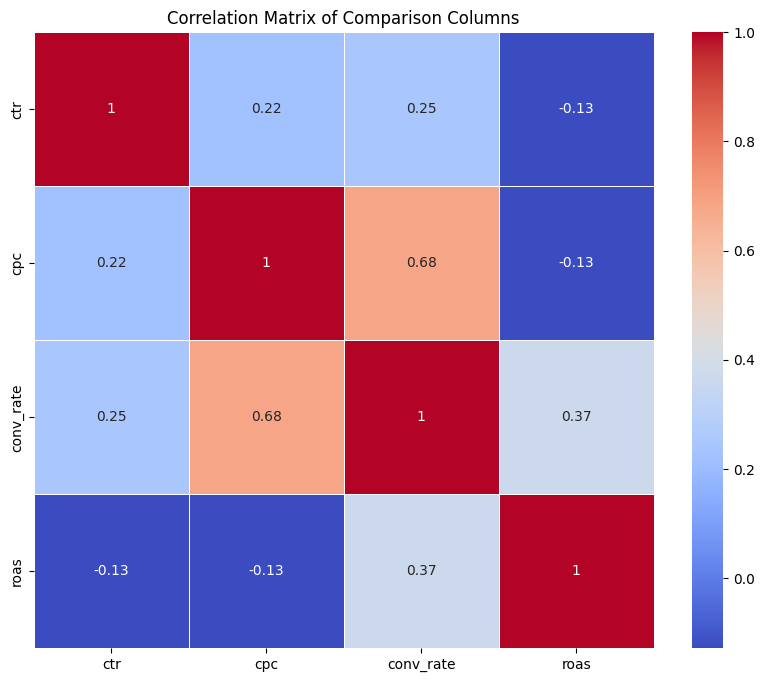

In [19]:
# Calculate the correlation matrix
correlation_matrix = df[comparison_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Comparison Columns')
plt.show()